In [1]:
import os

import torch
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import transforms

import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [2]:
class Cifar10(Dataset):

    def __init__(self, annotations_file, img_dir):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.labels = [
            "airplane",
            "automobile",
            "bird",
            "cat",
            "deer",
            "dog", 
            "frog",
            "horse", 
            "ship", 
            "truck"
        ]
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(idx+1)+".png")
        image = read_image(img_path).float()
        
        label = self.img_labels.iloc[idx, 1]	
        y = torch.tensor(self.labels.index(label)).to(device)
        image = image.to(device)
        return image, y

In [3]:
from torch.utils.data import DataLoader

batch_size = 64
learning_rate = 0.001

training_data = Cifar10("./dataset/trainLabels.csv", "./dataset/train/")
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)

In [4]:
import ResNet
model = ResNet.ResNet(in_channels=3, bottle_neck_in_each_block=[3,4,3], expansion=2).to(device)

In [5]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
loss_history = []
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%100 == 0:
            loss_history.append(loss.item())
            print(f"Loss: {loss} , {batch+1} / {int(size/batch_size)+1}")


In [13]:
epochs = 20
for t in range(epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer)

Loss: 0.6844698786735535 , 1 / 782
Loss: 0.7626063823699951 , 101 / 782
Loss: 0.87436842918396 , 201 / 782
Loss: 0.810075044631958 , 301 / 782
Loss: 1.033346176147461 , 401 / 782
Loss: 0.7125239968299866 , 501 / 782
Loss: 0.9095220565795898 , 601 / 782
Loss: 0.6912179589271545 , 701 / 782
Loss: 0.8266717791557312 , 1 / 782
Loss: 0.6596958637237549 , 101 / 782
Loss: 0.8442487120628357 , 201 / 782
Loss: 0.8375256061553955 , 301 / 782
Loss: 0.8297649025917053 , 401 / 782
Loss: 0.9875198602676392 , 501 / 782


KeyboardInterrupt: 

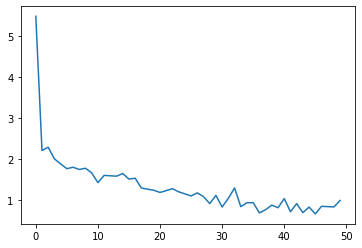

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history)